In [5]:
import os
import kagglehub
dataset_path = kagglehub.dataset_download("arjuntejaswi/plant-village")

print("Files in dataset:")
print(os.listdir(dataset_path))


C:\Users\Ali Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████████████████████████████████████████████| 329M/329M [06:14<00:00, 920kB/s]

Extracting files...


Files in dataset:
['PlantVillage']


In [6]:
import os
print(os.getcwd())  # This prints the current working directory


D:\Deep learning Projects\Potato_Desease_Recognition


In [12]:
import os

# List files inside the dataset folder
print("Contents of dataset:", os.listdir(dataset_path))

Contents of dataset: ['PlantVillage']


In [13]:
plant_village_path = os.path.join(dataset_path, "PlantVillage")

# List files inside PlantVillage
print("Files in PlantVillage:", os.listdir(plant_village_path))


Files in PlantVillage: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [14]:
import os
import shutil
import kagglehub


In [15]:
# Download dataset (default location)
dataset_path = kagglehub.dataset_download("arjuntejaswi/plant-village")

# Print the path where it's downloaded
print("Dataset downloaded to:", dataset_path)


Dataset downloaded to: C:\Users\Ali Ahmad\.cache\kagglehub\datasets\arjuntejaswi\plant-village\versions\1


In [16]:
# Define the target directory where you want to move the dataset
target_dir = r"D:\Deep learning Projects\Potato_Desease_Recognition"

# Ensure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Move the dataset
shutil.move(dataset_path, target_dir)

# Print the new dataset path
new_dataset_path = os.path.join(target_dir, os.path.basename(dataset_path))
print("Dataset moved to:", new_dataset_path)


Dataset moved to: D:\Deep learning Projects\Potato_Desease_Recognition\1


In [17]:
# List files in the new dataset directory
print("Files in new location:", os.listdir(new_dataset_path))


Files in new location: ['PlantVillage']


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [29]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 26
CHENNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


(32, 256, 256, 3)
[1 0 2 0 0 1 1 0 0 0 1 0 1 0 2 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0]


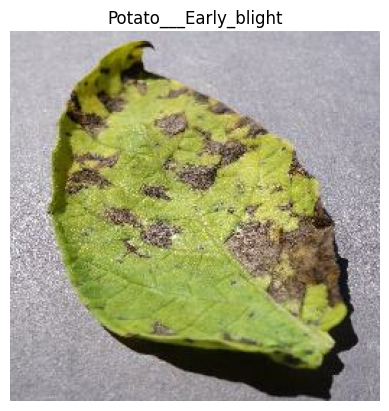

In [8]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

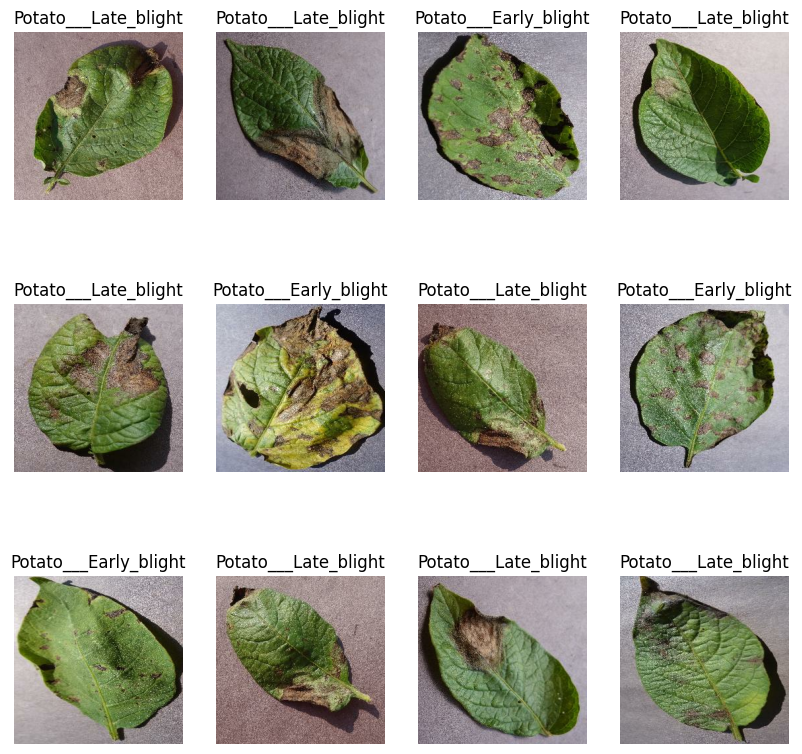

In [9]:
plt.figure(figsize = (10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [13]:
val_size= 0.1
len(dataset)*val_size

6.800000000000001

In [14]:
val_ds = test_ds.take(6)

In [15]:
test_ds = test_ds.skip(6)

In [16]:
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True,shuffle_size = 1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [18]:
len(train_ds),len(test_ds),len(val_ds)

(54, 8, 6)

In [19]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds),len(test_ds)

(54, 8)

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
scaling_and_resizing = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),   # Resize images
    layers.Rescaling(1.0 / 255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),  # Correct spelling
    layers.RandomRotation(0.2)
])

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHENNELS)
class_num = 3

model = models.Sequential([
    scaling_and_resizing,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (2,2),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (2,2),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(class_num,activation = 'softmax')
])

model.build(input_shape = input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [26]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])

In [30]:
history = model.fit(train_ds,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         verbose = 1,
         validation_data = val_ds)

Epoch 1/26
54/54 [==============================] - 687s 13s/step - loss: 0.8386 - accuracy: 0.5596 - val_loss: 0.7341 - val_accuracy: 0.5938
Epoch 2/26
54/54 [==============================] - 544s 10s/step - loss: 0.6281 - accuracy: 0.7193 - val_loss: 0.4985 - val_accuracy: 0.7917
Epoch 3/26
54/54 [==============================] - 543s 10s/step - loss: 0.3935 - accuracy: 0.8385 - val_loss: 0.3410 - val_accuracy: 0.8646
Epoch 4/26
54/54 [==============================] - 543s 10s/step - loss: 0.2843 - accuracy: 0.8924 - val_loss: 0.3081 - val_accuracy: 0.8802
Epoch 5/26
54/54 [==============================] - 604s 11s/step - loss: 0.2755 - accuracy: 0.8814 - val_loss: 0.3061 - val_accuracy: 0.8594
Epoch 6/26
54/54 [==============================] - 533s 10s/step - loss: 0.2234 - accuracy: 0.9132 - val_loss: 0.2979 - val_accuracy: 0.8698
Epoch 7/26
54/54 [==============================] - 332s 6s/step - loss: 0.1980 - accuracy: 0.9253 - val_loss: 0.5772 - val_accuracy: 0.7865
Epoch 8

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 20s 856ms/step - loss: 0.1196 - accuracy: 0.9609


In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 26, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy'][:5]

[0.5596064925193787,
 0.7193287014961243,
 0.8385416865348816,
 0.8923611044883728,
 0.8813657164573669]

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

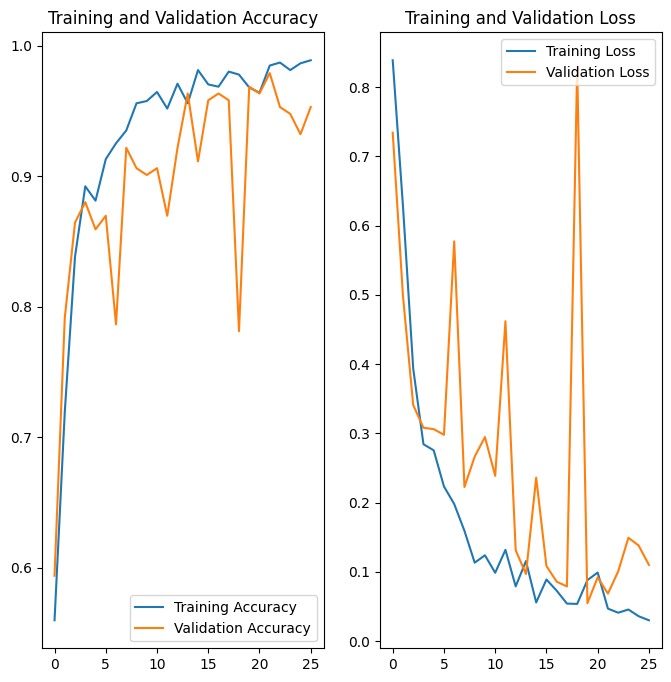

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Early_blight


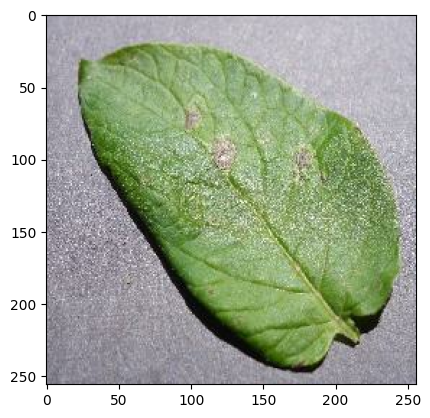

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 78ms/step


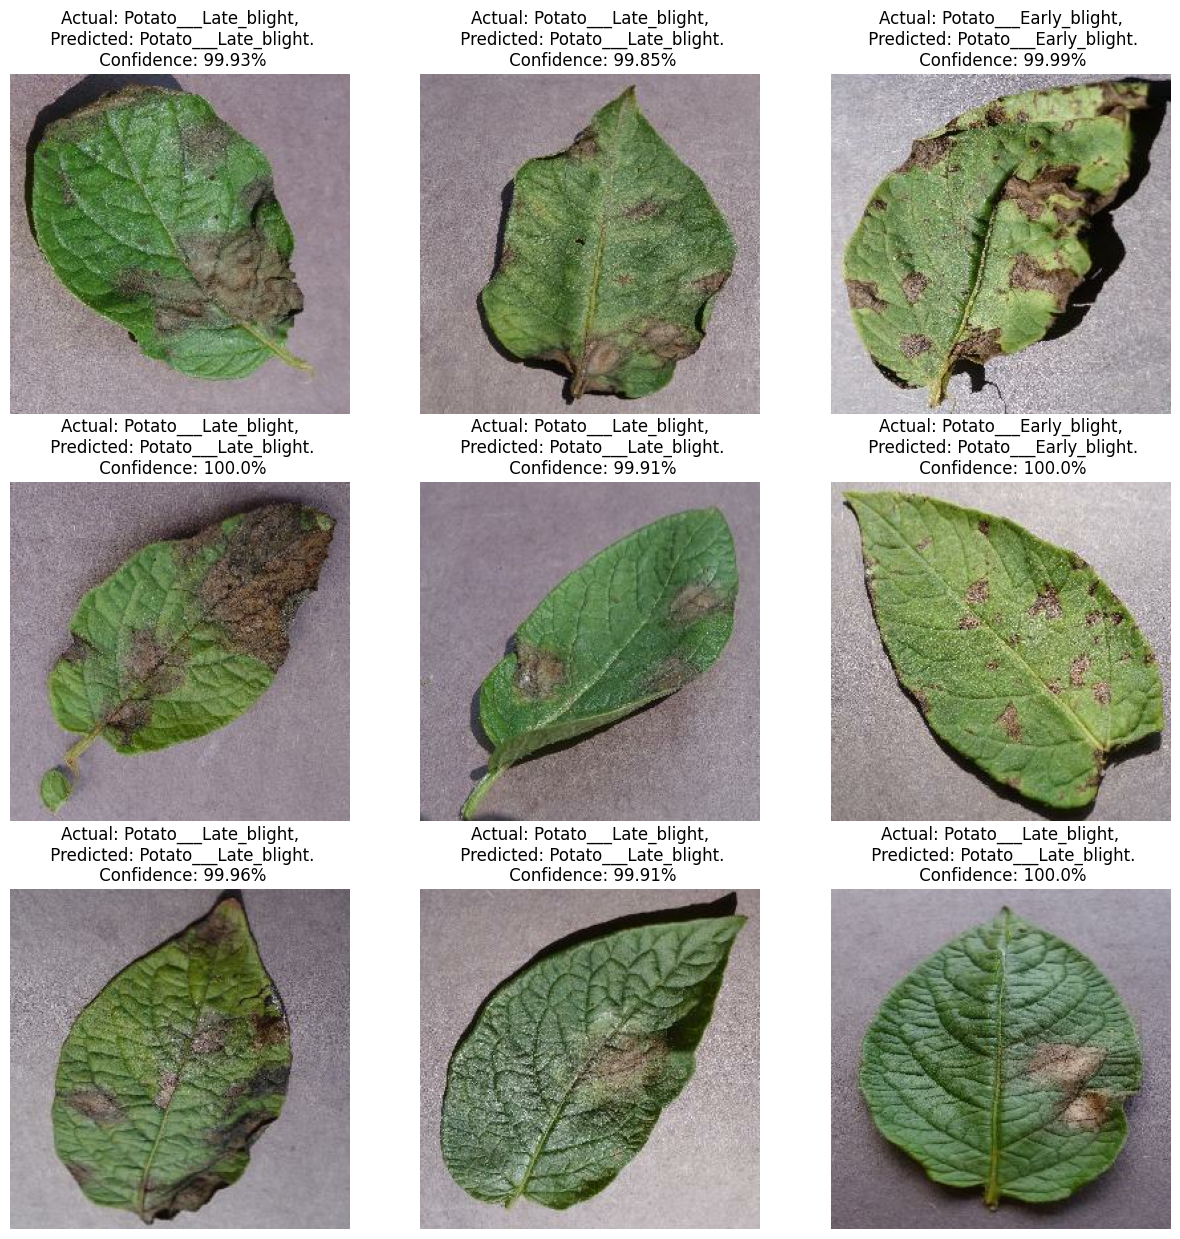

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [42]:
import os
model.export('./saved_models/1')

INFO:tensorflow:Assets written to: ./saved_models/1\assets


INFO:tensorflow:Assets written to: ./saved_models/1\assets


Saved artifact at './saved_models/1'. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: float32 Tensor, shape=(None, 256, 256, 3)
  Returns:
    float32 Tensor, shape=(None, 3)
